In [1]:
import torch
import numpy as np
from torch_geometric.datasets import Planetoid

In [2]:
dataset = Planetoid(root = 'data', name = 'cora')
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [3]:
X = data.x # [num_noes, num_features] -> [2708, 1433]
Y = data.y  # [num_nodes] -> [2708]
edge_index = data.edge_index 

### Feature visualizations

In [28]:
word_counts = torch.sum(X, dim = 0)
word_counts = np.array(word_counts)

C:\Users\ROG\AppData\Local\Temp\ipykernel_16616\1658719148.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  word_counts = np.array(word_counts)


at max 1083 out of 2708 paper has a word in commmon

In [29]:
np.max(word_counts)

np.float32(1083.0)

so each paper has only at most 30 word shown up out of 1433

In [30]:
node_word_counts = torch.sum(X, dim=1).numpy()
np.max(node_word_counts)

np.float32(30.0)

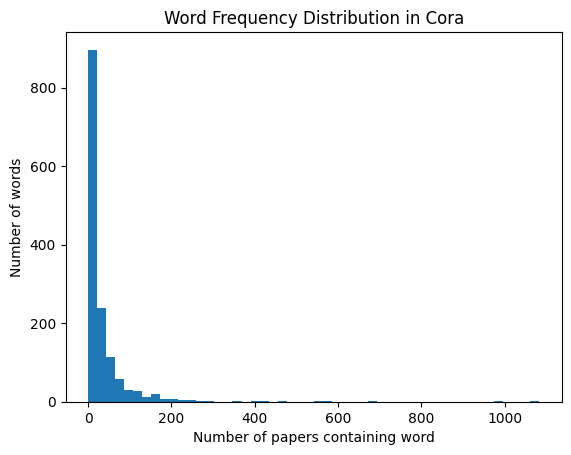

In [31]:
import matplotlib.pyplot as plt

plt.hist(word_counts, bins = 50)
plt.xlabel("Number of papers containing word")
plt.ylabel("Number of words")
plt.title("Word Frequency Distribution in Cora")
plt.show()

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.numpy())


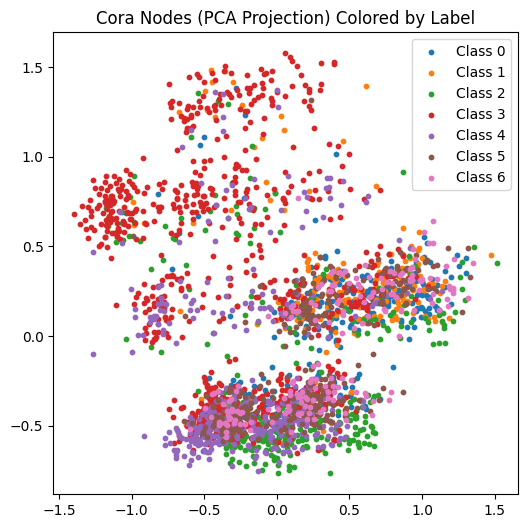

In [33]:
plt.figure(figsize=(6,6))

for label in torch.unique(Y):
    idx = (Y == label)
    plt.scatter(
        X_2d[idx, 0],
        X_2d[idx, 1],
        label=f"Class {label.item()}",
        s=10
    )

plt.legend()
plt.title("Cora Nodes (PCA Projection) Colored by Label")
plt.show()


### Networkx

In [4]:
from torch_geometric.utils import to_networkx
import networkx as nx

G = to_networkx(data)

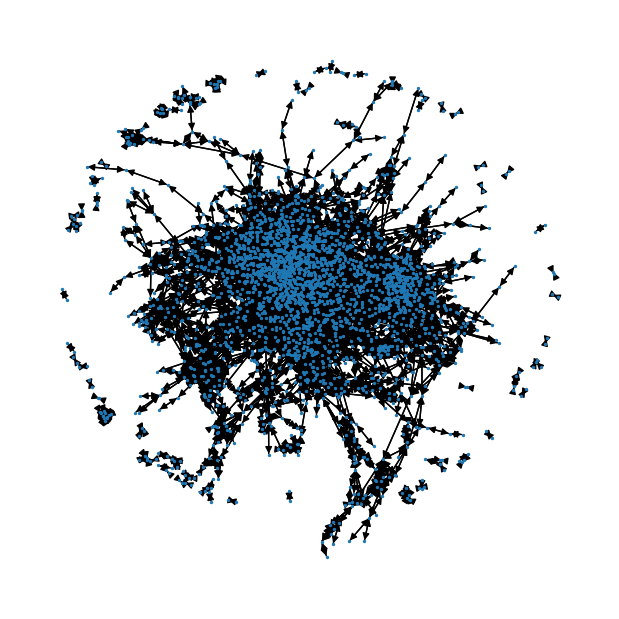

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(6,6))
nx.draw(G, node_size=2)
plt.show()


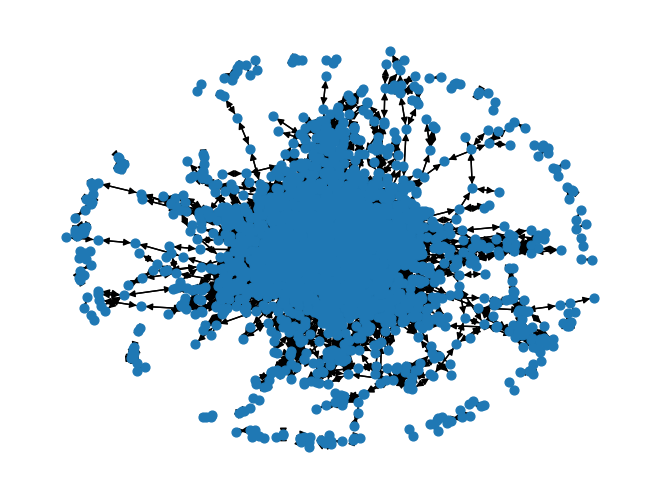

In [7]:
pos = nx.spring_layout(G)   # force-directed layout
nx.draw(G, pos, node_size=40, with_labels=False)
plt.show()


### Degree Stats

In [13]:
import numpy as np


In [23]:
degree = [d for _,d in G.degree()]
degree = np.array(degree)

# degree stats
mean_val = np.mean(degree)
median_val = np.median(degree)
min_val = np.min(degree)
max_val = np.max(degree)

values, counts = np.unique(degree, return_counts = True)
max_counts_index = np.argmax(counts)
mode_val = values[max_counts_index]
mode_val_count = values[max_counts_index]

print("Cora dataset Node degree Stats")
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"common degree : {mode_val_count}")
print(f"Minimum: {min_val}")
print(f"Maximum: {max_val}")

Cora dataset Node degree Stats
Mean: 7.796159527326441
Median: 6.0
Mode: 4
common degree : 4
Minimum: 2
Maximum: 336


In [19]:
sorted_degrees = sorted(degree, reverse= True)
sorted_degrees[:10]

[np.int64(336),
 np.int64(156),
 np.int64(148),
 np.int64(130),
 np.int64(88),
 np.int64(84),
 np.int64(80),
 np.int64(72),
 np.int64(68),
 np.int64(66)]

In [ ]:
bins = [0, 2, 5, 10, 20, 50, 100, 150, 200, 250,300, 350]

hist, bin_edges = np.histogram(degree, bins=bins)

for i in range(len(hist)):
    print(f"Degree {bin_edges[i]}-{bin_edges[i+1]}: {hist[i]} nodes")

Degree 0-2: 0 nodes
Degree 2-5: 1068 nodes
Degree 5-10: 942 nodes
Degree 10-20: 576 nodes
Degree 20-50: 105 nodes
Degree 50-100: 13 nodes
Degree 100-150: 2 nodes
Degree 150-200: 1 nodes
Degree 200-250: 0 nodes
Degree 250-300: 0 nodes
Degree 300-350: 1 nodes


In [27]:
print("class label vs degrees")
for label in np.unique(data.y.numpy()):
    label_nodes = (data.y.numpy() == label)
    print(label, degree[label_nodes].mean())


class label vs degrees
0 8.7008547008547
1 9.483870967741936
2 8.736842105263158
3 6.938875305623472
4 7.474178403755869
5 7.2885906040268456
6 7.311111111111111


In [26]:
agree = []
labels = data.y.numpy()
for node in G.nodes():
    node_label = labels[node]
    neigh_labels = [labels[n] for n in G.neighbors(node)]
    
    if len(neigh_labels) == 0:
        continue
        
    frac = np.mean(np.array(neigh_labels) == node_label)
    agree.append(frac)

print("Avg neighbour label agreement:", np.mean(agree))


Avg neighbour label agreement: 0.8251578275927922
